In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
directory= '/content/drive/MyDrive/mydata.csv'

In [49]:
syndata = pd.read_csv(directory)

In [50]:
Feature=syndata[['X','Y']].values
Class=syndata['Class'].values

print(Class.size)


150


In [51]:
print(Feature[:5])
print(Class[:5])

[[1.076  2.3718]
 [1.564  2.3074]
 [2.8873 2.3992]
 [1.2931 2.2522]
 [1.5912 2.9431]]
[0 0 0 0 0]


In [52]:


# Apply one-hot encoding using pandas
New_class = pd.get_dummies(Class)

# Display only the first 5 rows
print(New_class.head())


      0      1      2
0  True  False  False
1  True  False  False
2  True  False  False
3  True  False  False
4  True  False  False


In [53]:
class NeuralNetwork:
    def __init__(self):
        # Define the structure of the network
        self.input_neurons = 2
        self.hidden1_neurons = 6
        self.hidden2_neurons = 4
        self.hidden3_neurons = 5
        self.output_neurons = 3   # 3 classes

        # Learning rate
        self.lr = 0.03

        # Initialize weights randomly with standard normal distribution
        self.W_input_hidden1 = np.random.randn(self.input_neurons, self.hidden1_neurons) * 0.1
        self.W_hidden1_hidden2 = np.random.randn(self.hidden1_neurons, self.hidden2_neurons) * 0.1
        self.W_hidden2_hidden3 = np.random.randn(self.hidden2_neurons, self.hidden3_neurons) * 0.1
        self.W_hidden3_output = np.random.randn(self.hidden3_neurons, self.output_neurons) * 0.1

    def forward(self, X):
        # Forward pass: Input -> Hidden Layer 1
        self.Z1 = np.dot(X, self.W_input_hidden1)
        self.A1 = self.sigmoid(self.Z1)

        # Hidden Layer 1 -> Hidden Layer 2
        self.Z2 = np.dot(self.A1, self.W_hidden1_hidden2)
        self.A2 = self.sigmoid(self.Z2)

        # Hidden Layer 2 -> Hidden Layer 3
        self.Z3 = np.dot(self.A2, self.W_hidden2_hidden3)
        self.A3 = self.sigmoid(self.Z3)

        # Hidden Layer 3 -> Output Layer
        self.Z_out = np.dot(self.A3, self.W_hidden3_output)
        self.A_out = self.softmax(self.Z_out)  # Softmax for multi-class classification

        return self.A_out

    def backward(self, X, y, predictions):
        # Output layer error and delta
        error_out = y - predictions
        delta_out = error_out * self.lr

        # Hidden Layer 3 error and delta
        error_hidden3 = np.dot(delta_out, self.W_hidden3_output.T)
        delta_hidden3 = error_hidden3 * self.sigmoid_derivative(self.A3) * self.lr

        # Hidden Layer 2 error and delta
        error_hidden2 = np.dot(delta_hidden3, self.W_hidden2_hidden3.T)
        delta_hidden2 = error_hidden2 * self.sigmoid_derivative(self.A2) * self.lr

        # Hidden Layer 1 error and delta
        error_hidden1 = np.dot(delta_hidden2, self.W_hidden1_hidden2.T)
        delta_hidden1 = error_hidden1 * self.sigmoid_derivative(self.A1) * self.lr

        # Update weights
        self.W_hidden3_output += np.dot(self.A3.T, delta_out)
        self.W_hidden2_hidden3 += np.dot(self.A2.T, delta_hidden3)
        self.W_hidden1_hidden2 += np.dot(self.A1.T, delta_hidden2)
        self.W_input_hidden1 += np.dot(X.T, delta_hidden1)
    def train(self, input, target):
        output = self.forward(input)
        self.backward(input, target, output)
    def MeanSerr(self, input, target):
        predictions = self.forward(input)
        return np.mean(np.square(target - predictions))

    def train(self, input, target):
        output = self.forward(input)
        self.backward(input, target, output)
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, sig):
        return sig * (1 - sig)


    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Numerical stability
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def compute_loss(self, y, predictions):
        return np.mean(np.sum(-y * np.log(predictions + 1e-9), axis=1))

In [54]:
a=NeuralNetwork()
errors= []
for i in range(120000):
  a.train(Feature,New_class)
  error=a.MeanSerr(Feature,New_class)
  errors.append(error)
  if i%12000==0:
    errors.append(error)
    print(f"Epoch {i}: Error = {error}")

Epoch 0: Error = 0.22321095136414792
Epoch 12000: Error = 0.0002211932577345106
Epoch 24000: Error = 5.524341663422274e-06
Epoch 36000: Error = 1.4412276905992848e-06
Epoch 48000: Error = 6.284091463143446e-07
Epoch 60000: Error = 3.447937870137535e-07
Epoch 72000: Error = 2.1555359018896815e-07
Epoch 84000: Error = 1.4658285101267593e-07
Epoch 96000: Error = 1.057079385414216e-07
Epoch 108000: Error = 7.960321760988071e-08


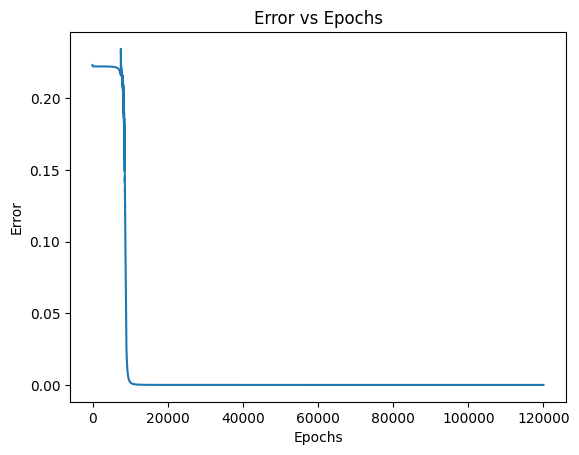

In [55]:
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epochs')
plt.show()

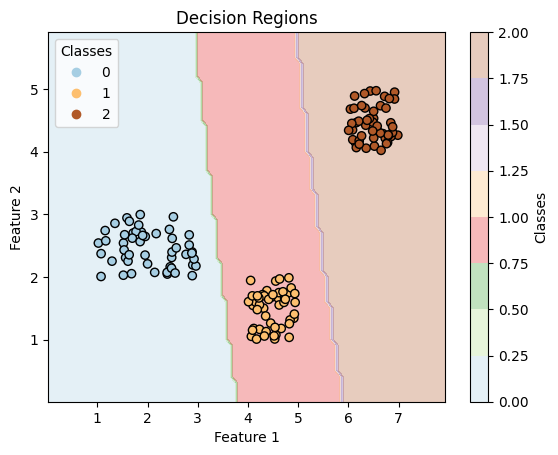

In [56]:

    """
    Plots decision regions and overlays data points.
    a: Trained neural network model.
    Feature: Input features (2D).
    New_class: True labels (1D).

    """
    # Define bounds of the grid
    x_min, x_max = Feature[:, 0].min() - 1, Feature[:, 0].max() + 1
    y_min, y_max = Feature[:, 1].min() - 1, Feature[:, 1].max() + 1

    # Create a grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Flatten the grid and predict for each point
    grid_points = np.c_[xx.ravel(), yy.ravel()]  # Combine into shape (n_points, 2)
    predictions = a.forward(grid_points)
    predicted_classes = np.argmax(predictions, axis=1)  # Get class index

    # Reshape predictions back to grid shape
    Z = predicted_classes.reshape(xx.shape)

    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.colorbar(label="Classes")

    # Overlay training data points
    scatter = plt.scatter(Feature[:, 0], Feature[:, 1], c=np.argmax(New_class, axis=1), cmap=plt.cm.Paired, edgecolor='k')
    plt.legend(*scatter.legend_elements(), title="Classes")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Regions')
    plt.show()


